## Libraries

In [196]:
## for data query
import cx_Oracle
## Data loading, processing and for more
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
# set seaborn style because it prettier
sns.set()

## Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

#encoding & preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


## Models
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import imblearn

## Some other libraries
import time
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data importing

In [200]:
%%time
data = pd.read_excel(r'C:\Users\SamadovIAz\Desktop\snd\machine learning models\fraud_detection\df_last.xlsx')
deploy = pd.read_excel(r'C:\Users\SamadovIAz\Desktop\snd\machine learning models\fraud_detection\deploy_data.xlsx')

Wall time: 1min 20s


In [94]:
data

,CUSTOMER,AGE,GENDER,MCC_GROUP,AMOUNT,EXPERIENCE_BY_MONTH,Fraud
0,4JZ9Z87,33,M,AFFILIATES,16.00,60,0
1,3JHUMJD,40,M,AFFILIATES,258.00,82,0
2,1E6R28G,39,F,AFFILIATES,10.00,192,0
3,6BVAVXV,25,F,AFFILIATES,327.00,7,0
4,5HV1XKM,30,M,AFFILIATES,198.00,74,0
...,...,...,...,...,...,...,...
747931,28GM43V,36,M,WHOLESALE SUPPLIERS AND MANUFACTURERS,580.00,153,1
747932,5J3258D,30,M,WHOLESALE SUPPLIERS AND MANUFACTURERS,3.90,67,1
747933,5J3258D,30,M,WHOLESALE SUPPLIERS AND MANUFACTURERS,28.33,67,1
747934,5VJ1EWF,28,M,WHOLESALE SUPPLIERS AND MANUFACTURERS,530.00,43,1


In [95]:
deploy

,CUSTOMER,AGE,GENDER,MCC_GROUP,AMOUNT,EXPERIENCE_BY_MONTH,FRAUD
0,0Y52MRJ,42,M,PERSONAL SERVICES,30.00,259,0
1,5UNXDMB,29,M,PERSONAL SERVICES,100.00,53,0
2,6AAWL0A,25,M,PERSONAL SERVICES,5.00,42,0
3,6FE9BGD,24,M,PERSONAL SERVICES,5.00,10,0
4,166KB3F,39,M,PERSONAL SERVICES,0.87,171,0
...,...,...,...,...,...,...,...
208780,63003KY,26,M,GOVERNMENT SERVICES,11.50,8,0
208781,4SKPEVY,33,M,GOVERNMENT SERVICES,3.00,71,0
208782,5LE54Q8,30,M,GOVERNMENT SERVICES,85.39,37,0
208783,5FV3N60,31,M,GOVERNMENT SERVICES,55.00,5,0


## Encoding

In [107]:
data_2=data.drop(['CUSTOMER'],axis=1)
data_2

,AGE,GENDER,MCC_GROUP,AMOUNT,EXPERIENCE_BY_MONTH,Fraud
0,33,1,0,16.00,60,0
1,40,1,0,258.00,82,0
2,39,0,0,10.00,192,0
3,25,0,0,327.00,7,0
4,30,1,0,198.00,74,0
...,...,...,...,...,...,...
747931,36,1,18,580.00,153,1
747932,30,1,18,3.90,67,1
747933,30,1,18,28.33,67,1
747934,28,1,18,530.00,43,1


In [112]:
col_categorical = data_2.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_2[col] = data_2[col].astype('category')
data_2[col_categorical] = data_2[col_categorical].apply(lambda x: x.cat.codes)

In [114]:
X = data_2.drop(['Fraud'],axis=1)
y = data_2['Fraud']

## Handling with imbalancing (SMOTE)

In [115]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)

## Splitting

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
                                                        X_res,y_res,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        shuffle=True,
                                                        stratify=y_res
                                                    )

## Random Forest

In [117]:
rf_classifier = RandomForestClassifier(
                                          min_samples_leaf=50,
                                          n_estimators=150,
                                          bootstrap=True,
                                          oob_score=True,
                                          n_jobs=-1,
                                          random_state=47,
                                          max_features='sqrt'
                                      )

## Fitting

In [118]:
rf_classifier.fit(X_train,np.ravel(y_train))

RandomForestClassifier(min_samples_leaf=50, n_estimators=150, n_jobs=-1,
                       oob_score=True, random_state=47)

## Predicting

In [119]:
y_pred = rf_classifier.predict(X_test)

## Scoring

In [120]:
print("Classification Report for Random Forest Classifier: \n", 
                                                                  classification_report(y_test,
                                                                                        y_pred))
print("Confusion Matrix of Random Forest Classifier: \n",
                                                                  confusion_matrix(y_test,
                                                                                   y_pred))

Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    218024
           1       0.99      1.00      0.99    218024

    accuracy                           0.99    436048
   macro avg       0.99      0.99      0.99    436048
weighted avg       0.99      0.99      0.99    436048

Confusion Matrix of Random Forest Classifier: 
 [[215904   2120]
 [   998 217026]]


## Overfitting metrics

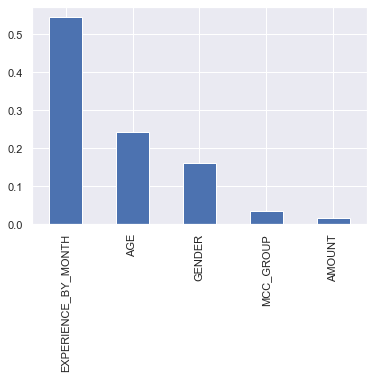

In [197]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## Deploying

In [198]:
deploy

,CUSTOMER,AGE,GENDER,MCC_GROUP,AMOUNT,EXPERIENCE_BY_MONTH,FRAUD
0,0Y52MRJ,42,M,PERSONAL SERVICES,30.00,259,0
1,5UNXDMB,29,M,PERSONAL SERVICES,100.00,53,0
2,6AAWL0A,25,M,PERSONAL SERVICES,5.00,42,0
3,6FE9BGD,24,M,PERSONAL SERVICES,5.00,10,0
4,166KB3F,39,M,PERSONAL SERVICES,0.87,171,0
...,...,...,...,...,...,...,...
208780,63003KY,26,M,GOVERNMENT SERVICES,11.50,8,0
208781,4SKPEVY,33,M,GOVERNMENT SERVICES,3.00,71,0
208782,5LE54Q8,30,M,GOVERNMENT SERVICES,85.39,37,0
208783,5FV3N60,31,M,GOVERNMENT SERVICES,55.00,5,0


In [199]:
deploy_2=deploy.drop(['CUSTOMER','FRAUD'],axis=1)
deploy_2

,AGE,GENDER,MCC_GROUP,AMOUNT,EXPERIENCE_BY_MONTH
0,42,M,PERSONAL SERVICES,30.00,259
1,29,M,PERSONAL SERVICES,100.00,53
2,25,M,PERSONAL SERVICES,5.00,42
3,24,M,PERSONAL SERVICES,5.00,10
4,39,M,PERSONAL SERVICES,0.87,171
...,...,...,...,...,...
208780,26,M,GOVERNMENT SERVICES,11.50,8
208781,33,M,GOVERNMENT SERVICES,3.00,71
208782,30,M,GOVERNMENT SERVICES,85.39,37
208783,31,M,GOVERNMENT SERVICES,55.00,5


In [124]:
col_categorical = deploy_2.select_dtypes(include= ['object']).columns
for col in col_categorical:
    deploy_2[col] = deploy_2[col].astype('category')
deploy_2[col_categorical] = deploy_2[col_categorical].apply(lambda x: x.cat.codes)

In [125]:
deploy_2

,AGE,GENDER,MCC_GROUP,AMOUNT,EXPERIENCE_BY_MONTH
0,42,1,7,30.00,259
1,29,1,7,100.00,53
2,25,1,7,5.00,42
3,24,1,7,5.00,10
4,39,1,7,0.87,171
...,...,...,...,...,...
208780,26,1,5,11.50,8
208781,33,1,5,3.00,71
208782,30,1,5,85.39,37
208783,31,1,5,55.00,5


In [127]:
possible_fraud=rf_classifier.predict(deploy_2)

In [134]:
deployment = pd.DataFrame({'CUSTOMER': deploy.CUSTOMER, 'possible_fraud': possible_fraud})

In [135]:
deployment

,CUSTOMER,possible_fraud
0,0Y52MRJ,0
1,5UNXDMB,0
2,6AAWL0A,0
3,6FE9BGD,0
4,166KB3F,0
...,...,...
208780,63003KY,0
208781,4SKPEVY,0
208782,5LE54Q8,0
208783,5FV3N60,0


In [ ]:
cd('C:\Users\SamadovIAz\Desktop\snd\machine learning models\fraud_detection')

In [158]:
pwd

'C:\\Users\\SamadovIAz\\Desktop\\snd\\machine learning models\\fraud_detection'

In [161]:
deployment.to_excel('deployment.xlsx', engine='xlsxwriter')

## Feature importance

In [162]:
rf_classifier.feature_importances_

array([0.24241008, 0.16200978, 0.03379161, 0.01720195, 0.54458657])

Text(0.5, 0, 'Random Forest Feature Importance')

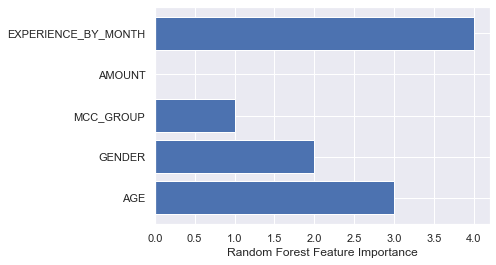

In [186]:
plt.barh(data[features].columns, rf_classifier.feature_importances_.argsort(axis=0, kind=None, order=None))
plt.xlabel("Random Forest Feature Importance")